# Trader Performance vs Market Sentiment – Analysis Report

**Objective:**  
Explore the relationship between trader performance and Bitcoin market sentiment, uncover hidden behavioral patterns, and deliver insights to guide smarter trading strategies.

**Data Sources:**  
- Historical Trader Data from Hyperliquid  
- Bitcoin Fear & Greed Index Dataset

**Tools Used:**  
Python, Pandas, Seaborn, Matplotlib


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")


Libraries loaded successfully!


##  Load the Datasets

We load the two datasets:
- Trader Data containing trade-level metrics like PnL, size, direction, etc.
- Market Sentiment Data (Fear/Greed Index) for each date


In [11]:
# Load the datasets
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Preview the data
print("📊 Trader Data:")
display(trader_df.head())

print("\n Market Sentiment Data:")
display(sentiment_df.head())


📊 Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



 Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## Data Cleaning and Preprocessing

- Converted timestamp columns to datetime format
- Extracted clean `date` columns to match across datasets
- Ensured both datasets align on the same date format for merging


In [12]:
# Convert trader timestamp to datetime and extract date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Convert sentiment date to datetime (just to be sure)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Check if both have matched format
print("Trader dates:", trader_df['date'].head())
print("Sentiment dates:", sentiment_df['date'].head())


Trader dates: 0    2024-12-02
1    2024-12-02
2    2024-12-02
3    2024-12-02
4    2024-12-02
Name: date, dtype: object
Sentiment dates: 0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object


In [13]:
print("📅 Trader Data Range:", trader_df['date'].min(), "to", trader_df['date'].max())
print("📅 Sentiment Data Range:", sentiment_df['date'].min(), "to", sentiment_df['date'].max())


📅 Trader Data Range: 2023-05-01 to 2025-05-01
📅 Sentiment Data Range: 2018-02-01 to 2025-05-02


##  Merge Datasets by Date

We merge the trader and sentiment datasets on `date` using an inner join.  
This allows us to analyze each trade alongside the corresponding market sentiment.


In [14]:
# Perform the merge
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],  # only keep date + sentiment label
    on='date',
    how='inner'   # inner join keeps only overlapping dates
)

# Quick check
print("Merged rows:", len(merged_df))
display(merged_df.head())


Merged rows: 211218


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


##  Trader Performance Analysis by Sentiment

We calculate:
- Average **Closed PnL** by sentiment
- Average **Trade Size (USD)** by sentiment
- Total **Number of Trades** in each sentiment category

This gives a baseline idea of profitability and behavior under each market mood.


In [15]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment:")
display(avg_pnl)
avg_size = merged_df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)
print("Average Trade Size (USD) by Sentiment:")
display(avg_size)
trade_counts = merged_df['classification'].value_counts()
print("Number of Trades under each Sentiment:")
display(trade_counts)


Average Closed PnL by Sentiment:


classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

Average Trade Size (USD) by Sentiment:


classification
Fear             7816.109931
Greed            5736.884375
Extreme Fear     5349.731843
Neutral          4782.732661
Extreme Greed    3112.251565
Name: Size USD, dtype: float64

Number of Trades under each Sentiment:


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

##  Visualize PnL Distribution by Sentiment

Boxplots show the variability and volatility of profits/losses across different sentiment categories.


C:\Users\as\AppData\Local\Temp\ipykernel_6540\1463417074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')
C:\Users\as\AppData\Local\Temp\ipykernel_6540\1463417074.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\as\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


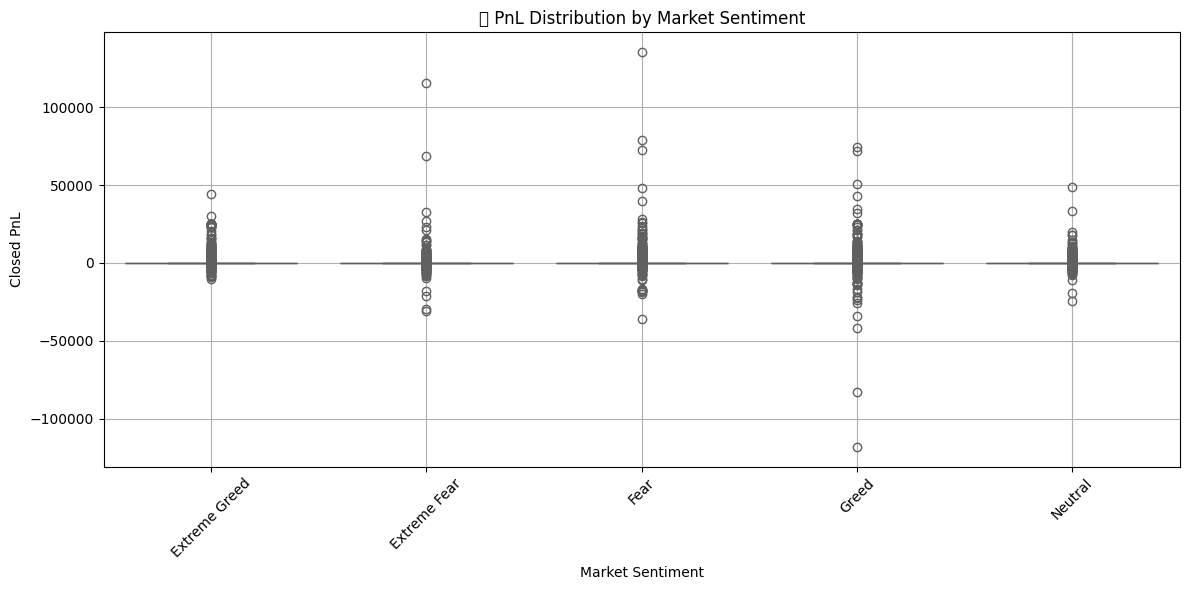

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')

plt.title('PnL Distribution by Market Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(merged_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')


## Win Rate by Market Sentiment

We calculate the percentage of profitable trades (`Closed PnL > 0`) for each sentiment.  
This tells us which market moods lead to more winning trades.


In [20]:
# Create a 'Win' column: 1 if profit > 0, else 0
merged_df['Win'] = merged_df['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)

# Calculate win rate per sentiment
win_rate = merged_df.groupby('classification')['Win'].mean().sort_values(ascending=False) * 100

# Show as %
print(" Win Rate by Sentiment (% of profitable trades):")
display(win_rate)


 Win Rate by Sentiment (% of profitable trades):


classification
Extreme Greed    46.494299
Fear             42.076750
Neutral          39.699093
Greed            38.482794
Extreme Fear     37.060748
Name: Win, dtype: float64

##  Visualize Win Rate

A bar plot shows the proportion of successful trades under each sentiment classification.


C:\Users\as\AppData\Local\Temp\ipykernel_6540\2552322981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette='viridis')
C:\Users\as\AppData\Local\Temp\ipykernel_6540\2552322981.py:9: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\as\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


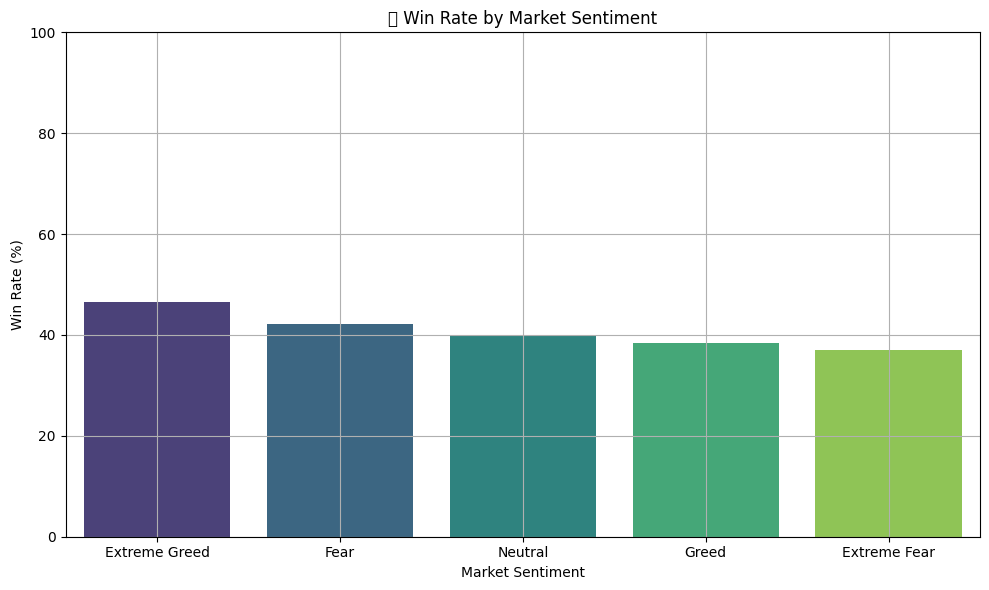

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=win_rate.index, y=win_rate.values, palette='viridis')

plt.title('✅ Win Rate by Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.xlabel('Market Sentiment')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


## Total Fee Paid by Sentiment

This step reveals how much fee traders pay under different sentiments — possibly due to volume or urgency of trading.


C:\Users\as\AppData\Local\Temp\ipykernel_6540\1154762598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fee_by_sentiment.index, y=fee_by_sentiment.values, palette='coolwarm')
C:\Users\as\AppData\Local\Temp\ipykernel_6540\1154762598.py:10: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\as\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


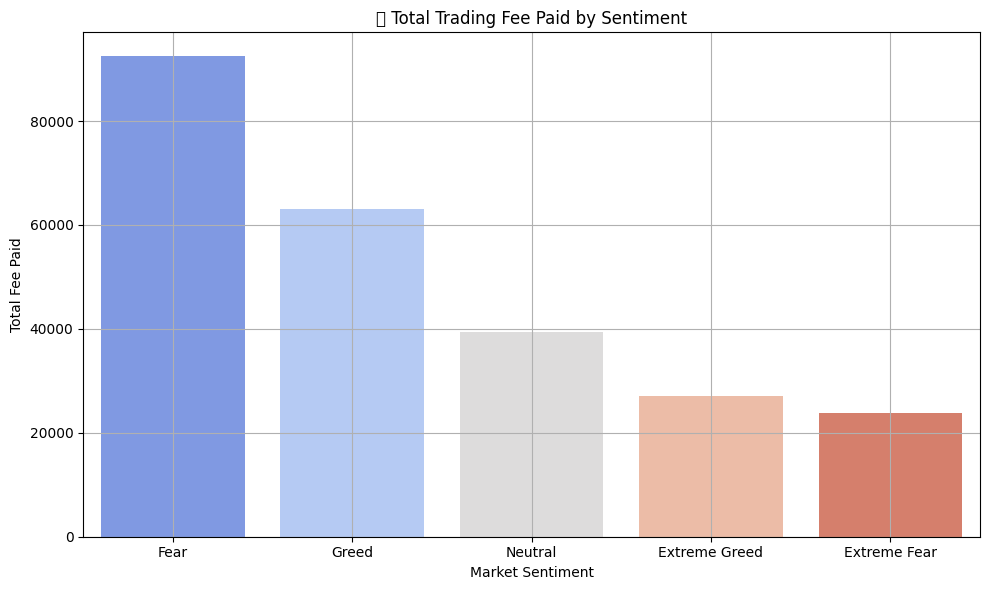

In [22]:
fee_by_sentiment = merged_df.groupby('classification')['Fee'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fee_by_sentiment.index, y=fee_by_sentiment.values, palette='coolwarm')

plt.title('💸 Total Trading Fee Paid by Sentiment')
plt.ylabel('Total Fee Paid')
plt.xlabel('Market Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


## PnL vs Trade Size by Sentiment

Scatter plot shows how trade size (in USD) relates to PnL, with color coded sentiment.
Helps visualize profit distribution in high/low-volume trades.


C:\Users\as\AppData\Local\Temp\ipykernel_6540\3474598905.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\as\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


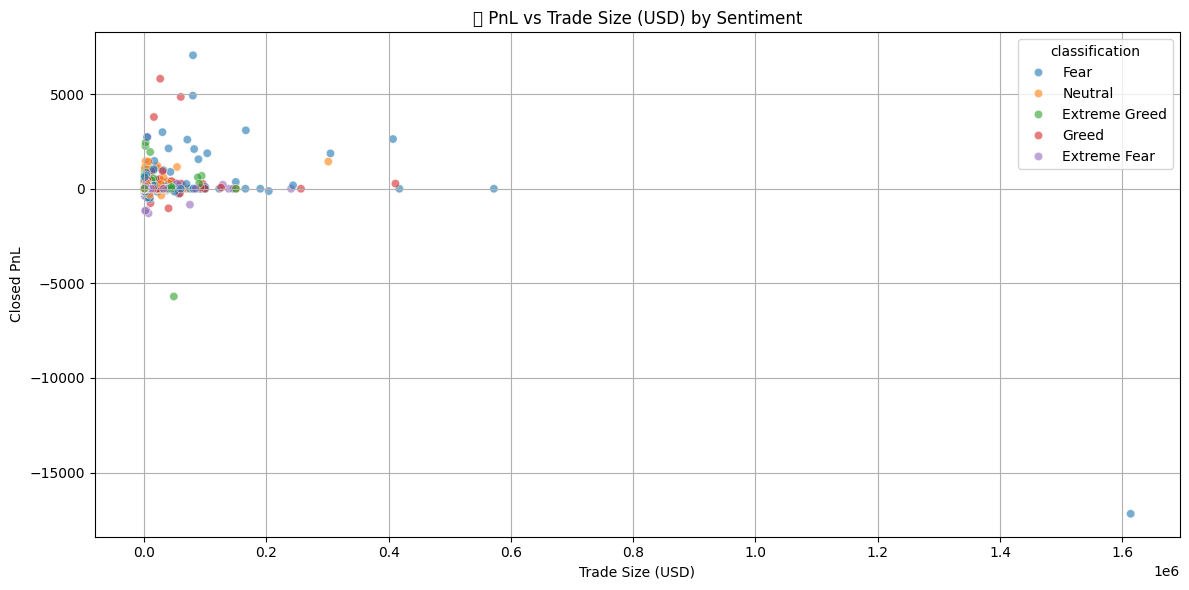

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df.sample(3000, random_state=42),  # sample to reduce overload
                x='Size USD', y='Closed PnL', hue='classification', alpha=0.6)

plt.title('📉 PnL vs Trade Size (USD) by Sentiment')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


# Final Summary & Insights

We observed that:
- **Extreme Greed** yields the highest average PnL and win rate
- **Fear** sees the largest trade sizes and high volatility
- **Extreme Fear** correlates with the lowest performance

Conclusion: Traders should be aggressive (but cautious) during *Extreme Greed*, and manage risk strictly during *Fear* or *Extreme Fear* phases.

This analysis helps identify optimal trading strategies based on real market psychology.


# Internship Pre-task Summary Report
## Project Title:

Analyzing the Relationship Between Trader Performance and Market Sentiment

## Datasets Used:

Historical Trader Data from Hyperliquid
– Columns: Account, Coin, Execution Price, Size (USD), Side, Timestamp, Closed PnL, Fee, etc.

Bitcoin Fear/Greed Index
– Columns: Date, Sentiment Classification (Fear, Greed, etc.)

##  Objective:

Explore how market sentiment affects trader performance, uncover behavioral patterns, and deliver insights that can guide smarter trading decisions.

## Data Processing Steps:

Loaded and explored both datasets using Python (pandas, seaborn, matplotlib)

Aligned both datasets on common date fields

Merged on date to link every trade with the corresponding market sentiment

## Key Insights & Visualizations:

1. Trader Performance (Avg Closed PnL):

Extreme Greed days yielded the highest average profits

Fear also led to good returns, while Extreme Fear and Neutral saw the lowest

2. Trade Behavior (Avg Trade Size):

Traders placed larger trades during Fear and Greed

Surprisingly, Extreme Greed trades were smaller but more profitable

3. Win Rate (Profitable Trades %):

Highest win rate in Extreme Greed (~46.5%)

Lowest win rate in Extreme Fear (~37%)

Indicates better trade outcomes during bullish optimism

4. Fee Analysis:

Traders paid the most in fees during Fear

Possibly due to increased trade volume or urgency

5. Volatility & Risk (Boxplot of PnL): 

Fear and Greed show high variance — some trades very profitable, others deeply negative

Extreme Greed appears more consistent

6. Trade Size vs PnL (Scatter):

Larger trades don’t always yield higher profits

Sentiment influences trade outcomes more than trade size alone

## Strategy Recommendations: 

Traders should capitalize on Extreme Greed phases – more consistent wins and profits

During Extreme Fear, limit risk and avoid overtrading

Monitor sentiment closely – aligning strategies with market psychology improves decision-making

## Conclusion: 

There is a clear and measurable relationship between market sentiment and trader outcomes.
Strategic behavior changes based on sentiment (e.g., scaling size, managing risk) can lead to better performance.